# Partie visualisation

## Création du dataframe

In [1]:
!pip3 install wordcloud pandas

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import os
import json
import pandas as pd
data = []

for filename in os.listdir("metadata"):
    if filename.endswith(".json"):
        with open(os.path.join("metadata", filename), "r") as f:
            metadata = json.load(f)

        name = metadata.get("name")
        scientific_name = metadata.get("scientific_name")
        family = metadata.get("family")
        location = metadata.get("location")
        width = metadata.get("width")
        height = metadata.get("height")
        format = metadata.get("format")
        mode = metadata.get("mode")
        dominated_colors = metadata.get("dominated_colors")
        dominated_colors_name = metadata.get("dominated_colors_name")
        exif = metadata.get("exif", {})
        make = exif.get("Make")
        model = exif.get("Model")
        orientation = exif.get("Orientation")
        if "exif" in metadata and "DateTime" in metadata["exif"]:
            date_time = metadata['exif']['DateTime'][:4]
        else:
            date_time = None

        data.append({
            "name": name,
            "scientific_name": scientific_name,
            "family": family,
            "location": location,
            "filename": filename,
            "width": width,
            "height": height,
            "format": format,
            "mode": mode,
            "dominated_colors": dominated_colors,
            "dominated_colors_name": dominated_colors_name,
            "make": make,
            "model": model,
            "orientation": orientation,
            "year": date_time
        })

df = pd.DataFrame(data)

df

,name,scientific_name,family,location,filename,width,height,format,mode,dominated_colors,dominated_colors_name,make,model,orientation,year
0,Rhynchotheca,Rhynchotheca,Vivianiaceae,South America,Rhynchotheca%20spinosa.json,757.0,1000.0,PNG,L,[],[],None,None,NaN,None
1,Herbertia,Herbertia,Tigridieae,South America,Herbertia%20lahue.json,1589.0,1590.0,JPEG,RGB,"[#495328, #bab8da]","[darkolivegreen, lightsteelblue]","CASIO COMPUTER CO.,LTD.",EX-Z1080,1.0,2009
2,Cortaderia,Cortaderia,Danthonieae,South America,Cortaderia%20selloana0.json,480.0,640.0,JPEG,RGB,"[#9fa790, #2d3920]","[darkseagreen, darkslategrey]",None,None,NaN,None
3,Gymnocalycium monvillei,Gymnocalycium monvillei,Gymnocalycium,South America,Gymnocalicium%20multiflorum%203.json,2288.0,1712.0,JPEG,RGB,"[#0d0c0d, #a39ea2]","[black, darkgrey]","OLYMPUS OPTICAL CO.,LTD",C750UZ,1.0,2004
4,Haageocereus platinospinus,Haageocereus platinospinus,Haageocereus,South America,Haageocereus%20platinospinus.json,NaN,NaN,None,None,None,None,None,None,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,Stoebe passerinoides,Stoebe passerinoides,Stoebe,Africa,Stoebe%20passerinoides%20scrub.json,2471.0,3706.0,JPEG,RGB,"[#372e25, #828fa7]","[darkslategrey, lightslategrey]",SONY,DSLR-A100,0.0,2009
637,Condalia microphylla,Condalia microphylla,Condalia,South America,Condalia%20microphylla1.json,640.0,480.0,JPEG,RGB,"[#a2bf91, #4b6944]","[darkseagreen, darkolivegreen]",None,None,NaN,None
638,Luma chequen,Luma chequen,Luma,South America,Luma%20chequen.json,NaN,NaN,None,None,None,None,None,None,NaN,None
639,Luma,Luma,Myrteae,South America,Luma%20apiculata5.json,1704.0,2272.0,JPEG,RGB,"[#27311a, #a6ca5e]","[darkslategrey, darkkhaki]",None,None,NaN,None


## Nombre de photos par année

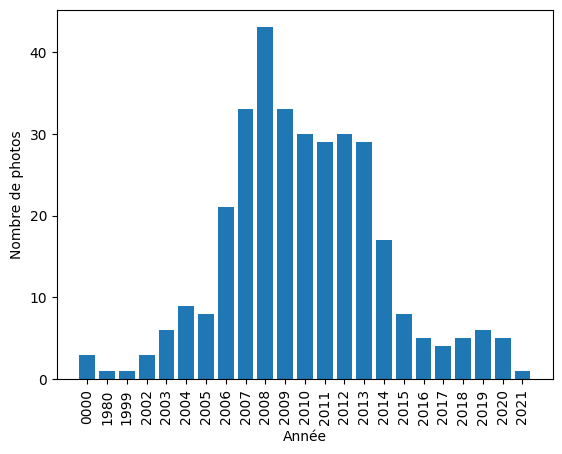

In [3]:
from pandas.io.json import _normalize
import pandas as pd
import json
import math
import matplotlib.pyplot as plot

year_counts = df.groupby('year').size()

plot.bar(year_counts.index, year_counts.values)
plot.xlabel('Année')
plot.ylabel('Nombre de photos')
plot.xticks(rotation=90)
plot.show()


## Nombre de photos par année et par marque d'appareil

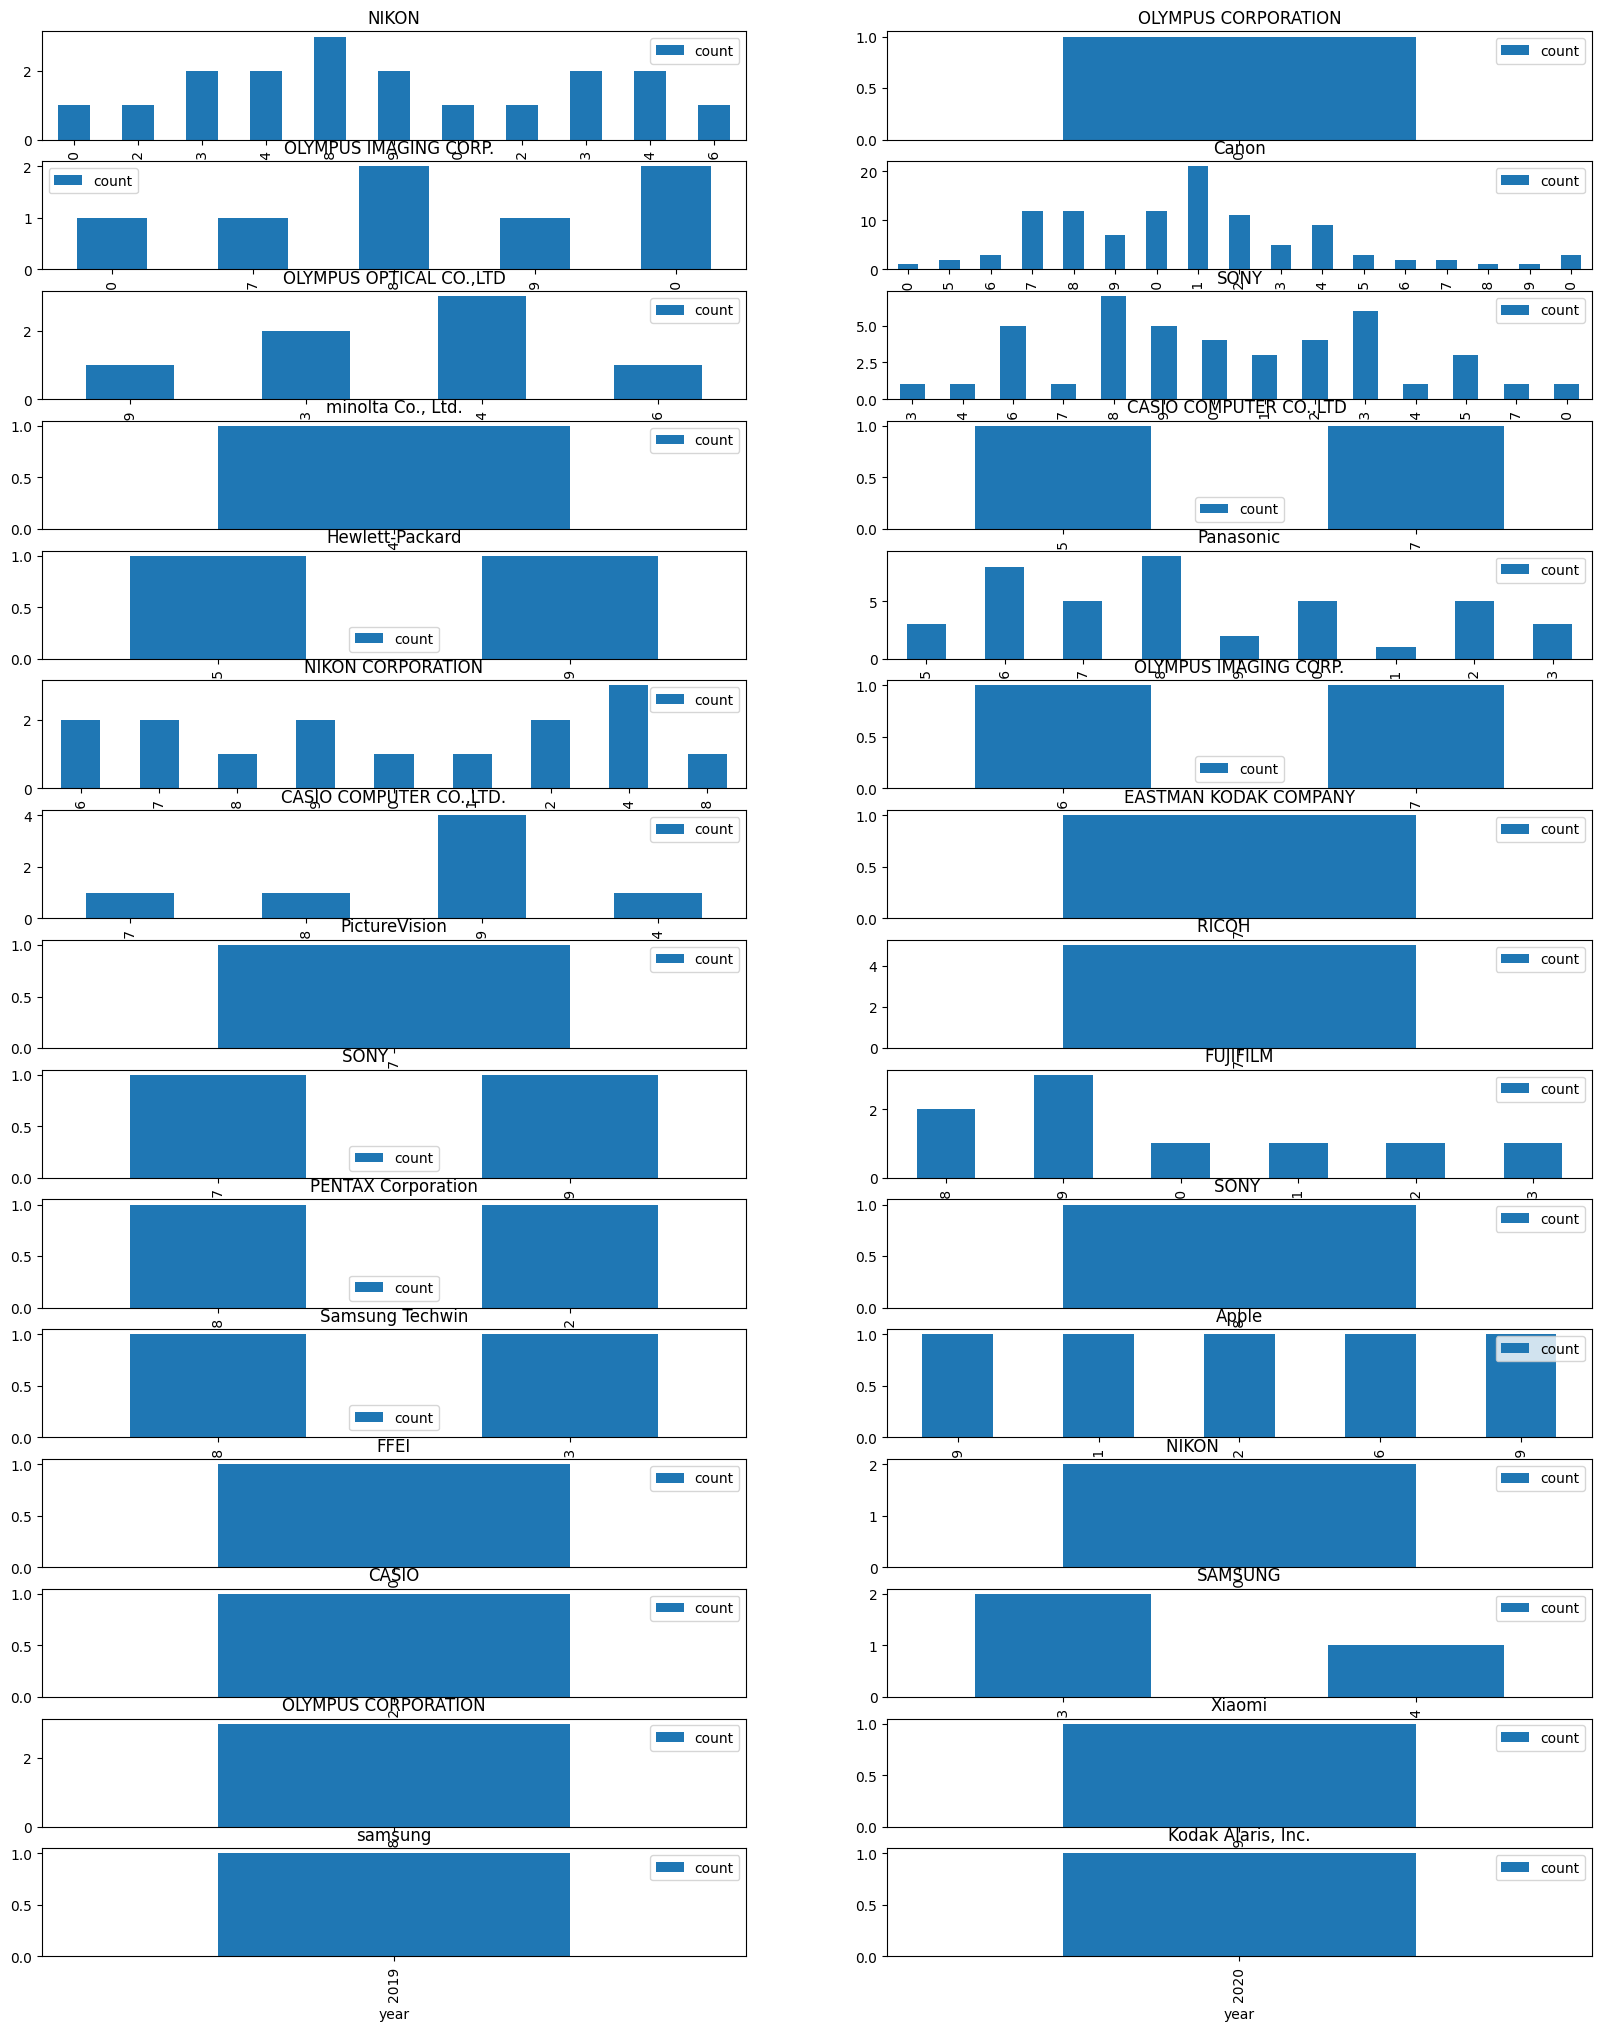

In [4]:
grouped = df.groupby(['year', 'make']).size()

grouped = grouped.reset_index(name='count')

nr = math.ceil(grouped['make'].nunique() / 2)
fig, axes = plot.subplots(nrows=nr, ncols=2, figsize=(20, 25))

for i, make in enumerate(grouped['make'].unique()):
    g = grouped[grouped['make'] == make]
    g.plot(
        x="year", y="count", kind="bar", title=make, ax=axes[math.floor(i / 2), i % 2]
    )

plot.show()


# Nombre d'images par famille (les 20 plus grandes familles)

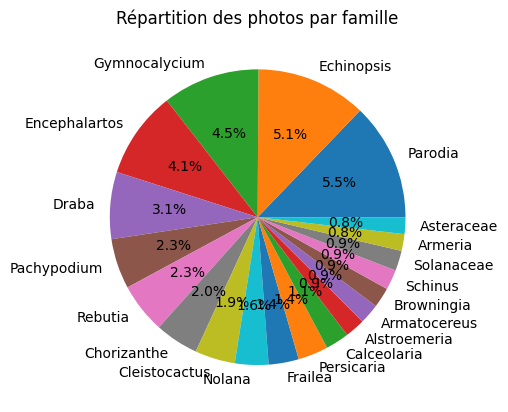

In [5]:
top_families = df.groupby('family').size().nlargest(20)
total_photos = len(df)
plot.pie(top_families.values, labels=top_families.index, autopct=lambda p: '{:.1f}%'.format(p * (sum(top_families.values)/total_photos)))
plot.title('Répartition des photos par famille')
plot.show()


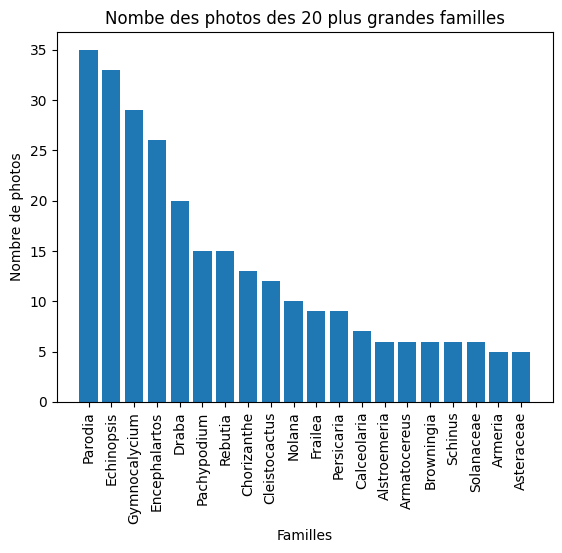

In [6]:
plot.title("Nombe des photos des 20 plus grandes familles")
plot.bar(top_families.index, top_families.values)
plot.xlabel('Familles')
plot.xticks(rotation=90)
plot.ylabel('Nombre de photos')
plot.show()


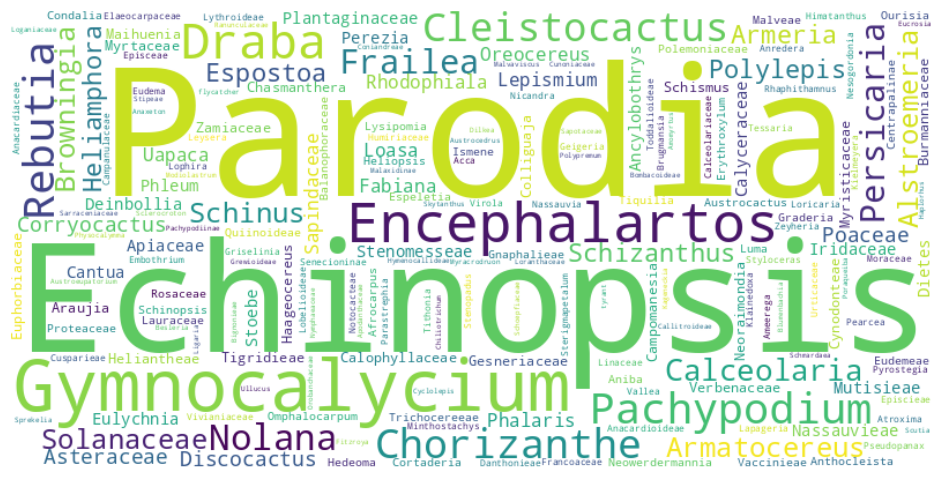

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

captions = ' '.join(df['family'].astype(str))

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(captions)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Les 10 couleurs les plus présentes 

In [8]:
colors = [color for list_color in df['dominated_colors_name'] if list_color is not None for color in list_color]

color_counts = pd.DataFrame(colors, columns=['color'])

color_counts

,color
0,darkolivegreen
1,lightsteelblue
2,darkseagreen
3,darkslategrey
4,black
...,...
1021,lightslategrey
1022,darkseagreen
1023,darkolivegreen
1024,darkslategrey


color
darkolivegreen    186
darkslategrey     177
darkgrey           71
grey               56
rosybrown          55
darkkhaki          52
dimgrey            51
black              50
silver             47
tan                44
dtype: int64
1026


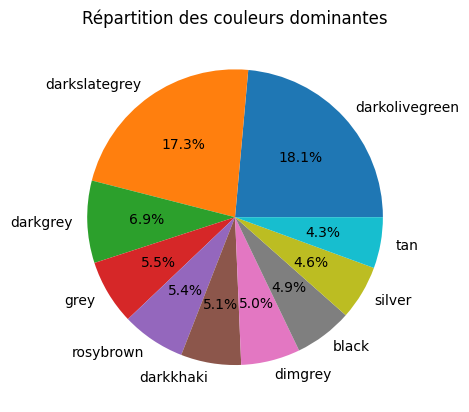

In [9]:
colors_size = color_counts.groupby("color").size().nlargest(10)
total_colors = len(color_counts)
print(colors_size)
print(total_colors)
plot.pie(colors_size.values, labels=colors_size.index, autopct=lambda p: '{:.1f}%'.format(p * (sum(colors_size.values)/total_colors)))
plot.title('Répartition des couleurs dominantes')
plot.show()

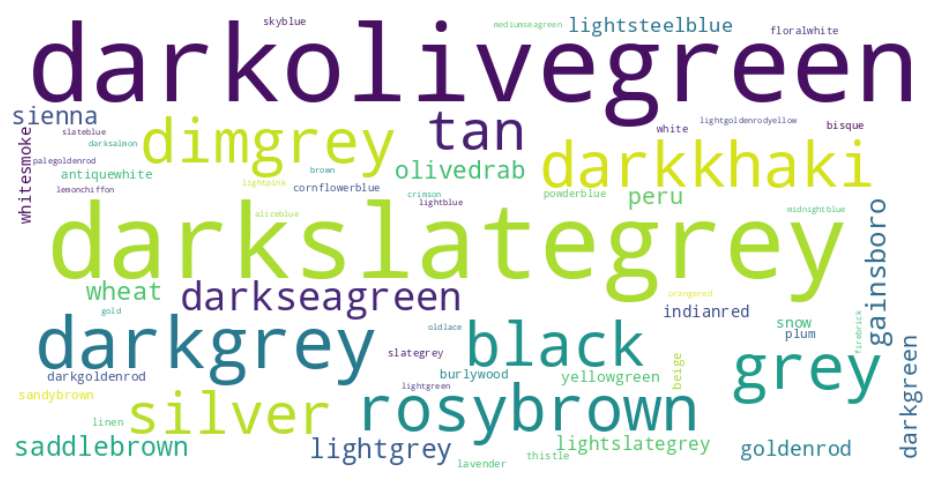

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

captions = ' '.join(color_counts['color'].astype(str))

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(captions)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Le nombre d'images par région géographique

In [11]:
import functools
region_size = df.groupby("location").size()
total_region = functools.reduce(lambda a, b: a+b , region_size)
print(total_region)
print(region_size)

641
location
Africa           108
South America    533
dtype: int64


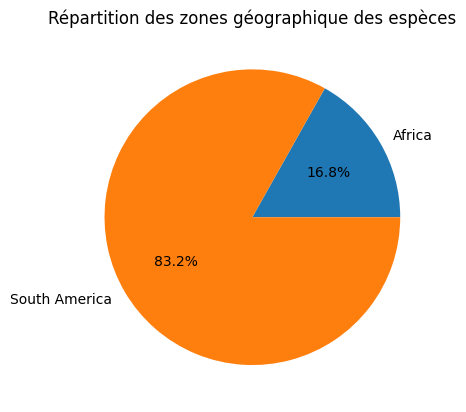

In [12]:
plot.pie(region_size.values, labels=region_size.index, autopct=lambda p: '{:.1f}%'.format(p * (sum(region_size.values)/total_region)))
plot.title('Répartition des zones géographique des espèces')
plot.show()

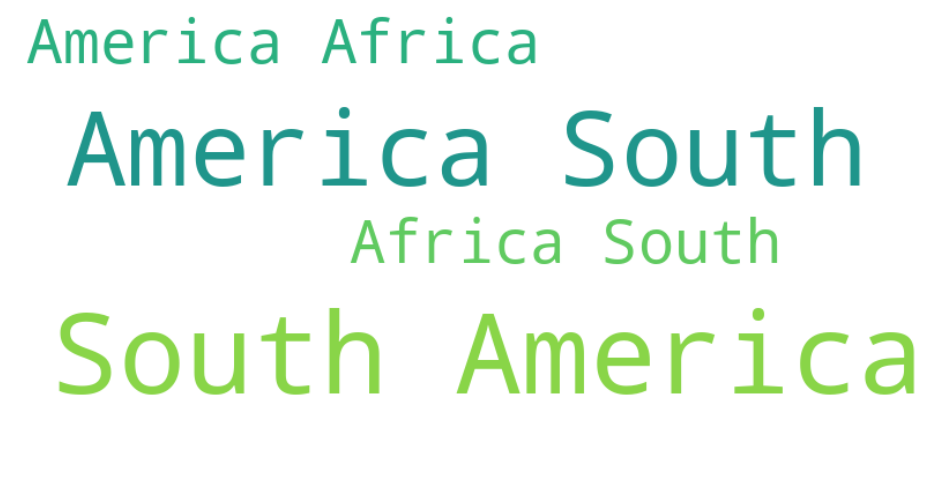

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

captions = ' '.join(df['location'].astype(str))

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(captions)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()